In [1]:
import random
import math

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

from Models import JointAutoregressiveHierarchical
from Dataloader import PreprocessedDataset, KodakDataset
from RateDistortionLoss import rd_loss
from Evaluator import CompressionEvaluator

### Prepare Dataset

In [3]:
transform_train = transforms.Compose([
    transforms.ToTensor(),  # convert to [0,1]
])

preprocessed_dir = "./data/coco_preprocessed"
train_dataset = PreprocessedDataset(preprocessed_dir, transform=transform_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

### Training

Training:   5%|███▎                                                              | 500/10000 [03:36<1:08:54,  2.30it/s]


[Step 500] Loss: 7.3760 | MSE: 0.013733 | PSNR: 18.622387 | BPP: 0.344771 | Ry: 0.191801 | Rz: 0.152969 | Total Bits: 22594.8984 | Base Bits: 12569.9014 | Side Information Bits: 10024.9971
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -27.6310 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -3.7351 | max: -3.3715
Latent Variable y | shape: (16, 128, 16, 16) | mean: -0.0152 | std: 0.8681 | range: -8.2051 - 4.2415
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: -0.0153 | std: 0.9146 | range: -8.4582 - 4.5935
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.1060 | std: 2.1233 | range: -12.6308 - 10.4232
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.1050 | std: 2.1464 | range: -12.9246 - 4.2415
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.2885
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: -0.0149 | std: 0.7789
Entropy Parameter sigmas | shape: (16, 3, 

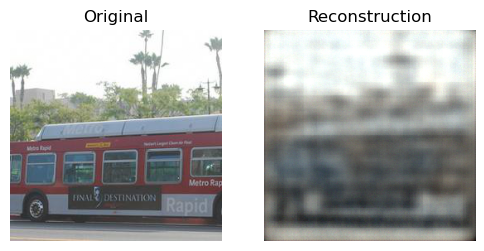

Training:  10%|██████▌                                                          | 1000/10000 [07:14<1:06:14,  2.26it/s]


[Step 1000] Loss: 4.1633 | MSE: 0.007515 | PSNR: 21.240906 | BPP: 0.315816 | Ry: 0.176718 | Rz: 0.139098 | Total Bits: 20697.3047 | Base Bits: 11581.3945 | Side Information Bits: 9115.9102
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -27.6310 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -3.3552 | max: -3.0592
Latent Variable y | shape: (16, 128, 16, 16) | mean: -0.0202 | std: 0.8762 | range: -8.3266 - 4.3148
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: -0.0202 | std: 0.9224 | range: -8.8018 - 4.5926
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0835 | std: 1.3862 | range: -8.4876 - 6.4486
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.0819 | std: 1.4154 | range: -8.3150 - 4.3148
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.3660
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: -0.0102 | std: 0.7891
Entropy Parameter sigmas | shape: (16, 3, 128

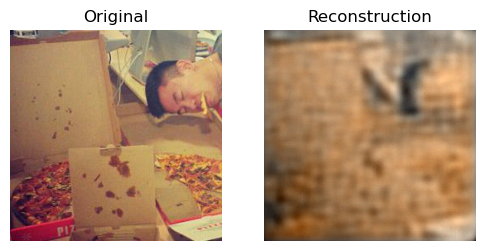

Training:  15%|█████████▊                                                       | 1500/10000 [10:52<1:01:42,  2.30it/s]


[Step 1500] Loss: 5.8946 | MSE: 0.010760 | PSNR: 19.681870 | BPP: 0.385455 | Ry: 0.259388 | Rz: 0.126067 | Total Bits: 25261.1680 | Base Bits: 16999.2266 | Side Information Bits: 8261.9395
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -16.6778 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -3.2543 | max: -2.7563
Latent Variable y | shape: (16, 128, 16, 16) | mean: -0.0177 | std: 1.0434 | range: -10.1946 - 6.6878
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: -0.0174 | std: 1.0820 | range: -10.2851 - 6.8612
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0436 | std: 1.2676 | range: -7.9028 - 5.7138
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.0449 | std: 1.3009 | range: -7.8958 - 6.6878
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.3985
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: -0.0057 | std: 0.9082
Entropy Parameter sigmas | shape: (16, 3, 1

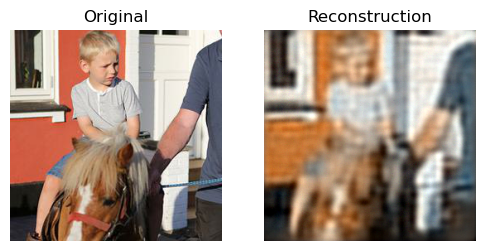

Training:  20%|█████████████▍                                                     | 2000/10000 [14:31<58:07,  2.29it/s]


[Step 2000] Loss: 4.3447 | MSE: 0.007789 | PSNR: 21.085350 | BPP: 0.356929 | Ry: 0.243601 | Rz: 0.113328 | Total Bits: 23391.7188 | Base Bits: 15964.6396 | Side Information Bits: 7427.0786
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -13.0146 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -3.0660 | max: -2.4673
Latent Variable y | shape: (16, 128, 16, 16) | mean: 0.0022 | std: 0.8371 | range: -11.3789 - 8.1337
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: 0.0015 | std: 0.8859 | range: -11.5471 - 7.8144
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0308 | std: 0.9466 | range: -4.9595 - 4.5063
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.0282 | std: 0.9900 | range: -5.2986 - 8.1337
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.3961
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: 0.0118 | std: 0.7027
Entropy Parameter sigmas | shape: (16, 3, 128,

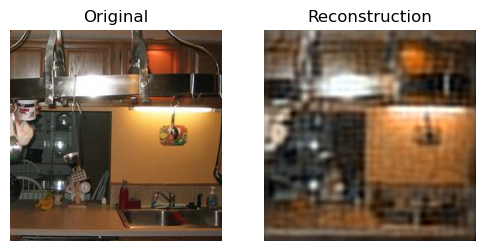

Training:  25%|████████████████▊                                                  | 2500/10000 [18:10<54:38,  2.29it/s]


[Step 2500] Loss: 3.1569 | MSE: 0.005491 | PSNR: 22.603718 | BPP: 0.345616 | Ry: 0.243538 | Rz: 0.102078 | Total Bits: 22650.2637 | Base Bits: 15960.4854 | Side Information Bits: 6689.7788
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -27.6310 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -3.5943 | max: -2.1923
Latent Variable y | shape: (16, 128, 16, 16) | mean: 0.0107 | std: 1.0237 | range: -14.1198 - 9.6264
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: 0.0109 | std: 1.0634 | range: -14.3483 - 9.2098
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0285 | std: 1.0405 | range: -5.6922 - 5.5349
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.0280 | std: 1.0784 | range: -5.7938 - 9.6264
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.3983
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: 0.0215 | std: 0.8733
Entropy Parameter sigmas | shape: (16, 3, 128,

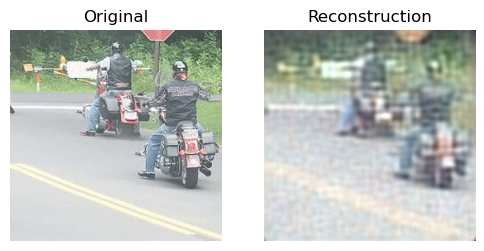

Training:  30%|████████████████████                                               | 3000/10000 [21:49<52:17,  2.23it/s]


[Step 3000] Loss: 3.1569 | MSE: 0.005489 | PSNR: 22.604771 | BPP: 0.346325 | Ry: 0.255255 | Rz: 0.091070 | Total Bits: 22696.7812 | Base Bits: 16728.3906 | Side Information Bits: 5968.3887
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -14.5584 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -3.5187 | max: -1.9297
Latent Variable y | shape: (16, 128, 16, 16) | mean: 0.0168 | std: 1.1290 | range: -13.7474 - 13.9487
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: 0.0168 | std: 1.1655 | range: -13.5351 - 14.3070
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0280 | std: 0.9827 | range: -4.6331 - 4.8003
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.0285 | std: 1.0247 | range: -4.9550 - 13.9487
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.4063
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: 0.0344 | std: 0.9741
Entropy Parameter sigmas | shape: (16, 3, 1

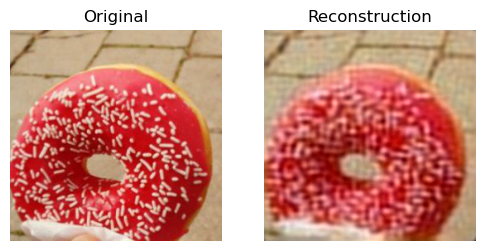

Training:  35%|███████████████████████▍                                           | 3500/10000 [25:29<47:28,  2.28it/s]


[Step 3500] Loss: 2.5998 | MSE: 0.004373 | PSNR: 23.592310 | BPP: 0.360841 | Ry: 0.279965 | Rz: 0.080876 | Total Bits: 23648.0469 | Base Bits: 18347.7832 | Side Information Bits: 5300.2651
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -14.6846 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -3.6542 | max: -1.6807
Latent Variable y | shape: (16, 128, 16, 16) | mean: 0.0196 | std: 1.3154 | range: -14.6544 - 11.3611
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: 0.0200 | std: 1.3469 | range: -14.9496 - 11.7540
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0184 | std: 0.9461 | range: -4.3038 - 4.4222
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.0183 | std: 0.9908 | range: -4.5952 - 11.3611
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.4192
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: 0.0471 | std: 1.1665
Entropy Parameter sigmas | shape: (16, 3, 1

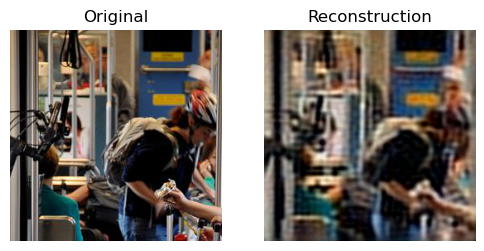

Training:  40%|██████████████████████████▊                                        | 4000/10000 [29:08<43:54,  2.28it/s]


[Step 4000] Loss: 2.8469 | MSE: 0.004886 | PSNR: 23.110277 | BPP: 0.345128 | Ry: 0.273935 | Rz: 0.071193 | Total Bits: 22618.3398 | Base Bits: 17952.6367 | Side Information Bits: 4665.7041
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -13.0662 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -3.6441 | max: -1.4443
Latent Variable y | shape: (16, 128, 16, 16) | mean: -0.0097 | std: 1.0294 | range: -14.3119 - 12.4410
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: -0.0096 | std: 1.0695 | range: -14.3736 - 12.8256
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0181 | std: 0.7862 | range: -4.0396 - 4.2803
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.0190 | std: 0.8357 | range: -4.4817 - 12.4410
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.4092
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: 0.0062 | std: 0.8692
Entropy Parameter sigmas | shape: (16, 3,

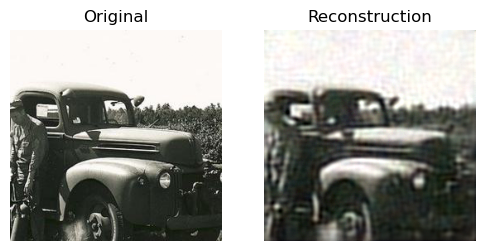

Training:  45%|██████████████████████████████▏                                    | 4500/10000 [32:48<39:58,  2.29it/s]


[Step 4500] Loss: 2.4567 | MSE: 0.004093 | PSNR: 23.879234 | BPP: 0.360871 | Ry: 0.298027 | Rz: 0.062844 | Total Bits: 23650.0566 | Base Bits: 19531.5098 | Side Information Bits: 4118.5469
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -17.8288 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -3.7949 | max: -1.2206
Latent Variable y | shape: (16, 128, 16, 16) | mean: 0.0007 | std: 1.2013 | range: -15.8130 - 14.7289
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: 0.0003 | std: 1.2360 | range: -16.1247 - 14.6064
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0146 | std: 0.7395 | range: -3.7535 - 3.9506
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.0161 | std: 0.7947 | range: -3.8554 - 14.7289
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.4045
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: 0.0227 | std: 1.0001
Entropy Parameter sigmas | shape: (16, 3, 1

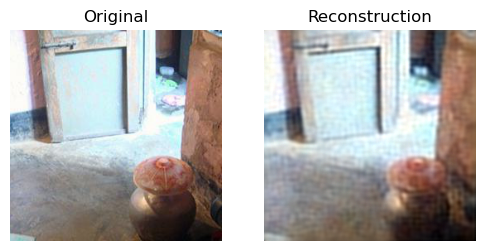

Training:  50%|█████████████████████████████████▌                                 | 5000/10000 [36:26<36:24,  2.29it/s]


[Step 5000] Loss: 2.0522 | MSE: 0.003362 | PSNR: 24.733822 | BPP: 0.330737 | Ry: 0.276203 | Rz: 0.054534 | Total Bits: 21675.1719 | Base Bits: 18101.2598 | Side Information Bits: 3573.9126
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -27.6310 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -3.7279 | max: -1.0157
Latent Variable y | shape: (16, 128, 16, 16) | mean: 0.0169 | std: 1.3185 | range: -17.1669 - 14.0815
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: 0.0171 | std: 1.3492 | range: -17.4472 - 13.8970
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0145 | std: 0.6644 | range: -3.2573 - 3.3441
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.0148 | std: 0.7240 | range: -3.5537 - 14.0815
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.3863
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: 0.0415 | std: 1.1301
Entropy Parameter sigmas | shape: (16, 3, 1

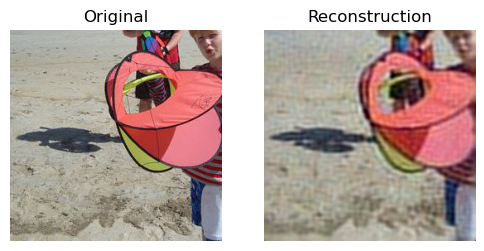

Training:  55%|████████████████████████████████████▊                              | 5500/10000 [40:06<32:55,  2.28it/s]


[Step 5500] Loss: 3.5971 | MSE: 0.006251 | PSNR: 22.040215 | BPP: 0.396427 | Ry: 0.348111 | Rz: 0.048316 | Total Bits: 25980.2285 | Base Bits: 22813.7969 | Side Information Bits: 3166.4321
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -27.6310 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -4.0089 | max: -0.8305
Latent Variable y | shape: (16, 128, 16, 16) | mean: 0.0089 | std: 1.2814 | range: -20.8037 - 17.4270
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: 0.0089 | std: 1.3135 | range: -20.8663 - 17.7151
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0154 | std: 0.6441 | range: -4.0697 - 3.0567
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.0166 | std: 0.7036 | range: -4.2720 - 17.4270
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.4080
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: 0.0219 | std: 1.0236
Entropy Parameter sigmas | shape: (16, 3, 1

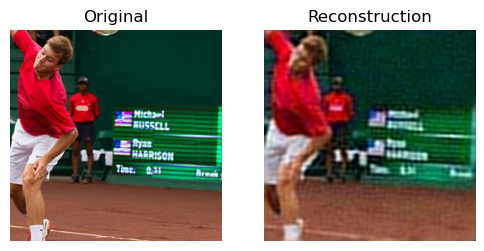

Training:  60%|████████████████████████████████████████▏                          | 6000/10000 [43:45<29:24,  2.27it/s]


[Step 6000] Loss: 2.1839 | MSE: 0.003555 | PSNR: 24.491737 | BPP: 0.363806 | Ry: 0.322310 | Rz: 0.041497 | Total Bits: 23842.4141 | Base Bits: 21122.8984 | Side Information Bits: 2719.5161
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -13.6873 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -4.3440 | max: -0.6660
Latent Variable y | shape: (16, 128, 16, 16) | mean: 0.0035 | std: 1.0439 | range: -18.1396 - 17.9795
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: 0.0034 | std: 1.0833 | range: -18.3291 - 18.3059
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0149 | std: 0.5400 | range: -3.0819 - 3.2362
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.0139 | std: 0.6120 | range: -3.1974 - 17.9795
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.4077
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: 0.0176 | std: 0.8232
Entropy Parameter sigmas | shape: (16, 3, 1

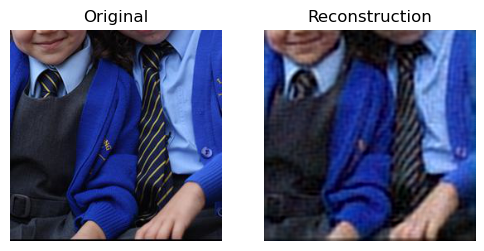

Training:  65%|███████████████████████████████████████████▌                       | 6500/10000 [47:24<25:32,  2.28it/s]


[Step 6500] Loss: 2.6352 | MSE: 0.004406 | PSNR: 23.559906 | BPP: 0.379525 | Ry: 0.343319 | Rz: 0.036206 | Total Bits: 24872.5664 | Base Bits: 22499.7852 | Side Information Bits: 2372.7830
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -11.7732 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -4.8961 | max: -0.5251
Latent Variable y | shape: (16, 128, 16, 16) | mean: -0.0004 | std: 1.2220 | range: -18.2664 - 17.2989
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: -0.0009 | std: 1.2559 | range: -18.1013 - 17.5600
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0082 | std: 0.5211 | range: -4.4554 - 3.1508
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.0032 | std: 0.5957 | range: -4.6616 - 17.2989
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.4067
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: 0.0206 | std: 0.9790
Entropy Parameter sigmas | shape: (16, 3,

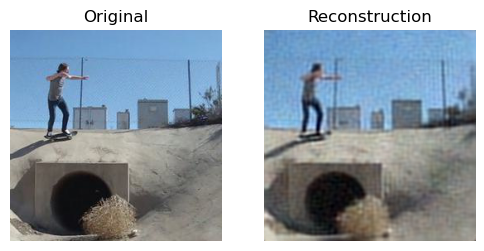

Training:  70%|██████████████████████████████████████████████▉                    | 7000/10000 [51:03<21:56,  2.28it/s]


[Step 7000] Loss: 2.6203 | MSE: 0.004366 | PSNR: 23.598843 | BPP: 0.384726 | Ry: 0.352796 | Rz: 0.031929 | Total Bits: 25213.3809 | Base Bits: 23120.8711 | Side Information Bits: 2092.5093
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -18.8140 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -5.0882 | max: -0.4060
Latent Variable y | shape: (16, 128, 16, 16) | mean: 0.0020 | std: 1.4034 | range: -20.8450 - 20.5568
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: 0.0016 | std: 1.4331 | range: -20.6873 - 20.6589
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0030 | std: 0.4959 | range: -5.3166 - 2.2517
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.0030 | std: 0.5744 | range: -5.2613 - 20.5568
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.4008
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: 0.0208 | std: 1.1316
Entropy Parameter sigmas | shape: (16, 3, 1

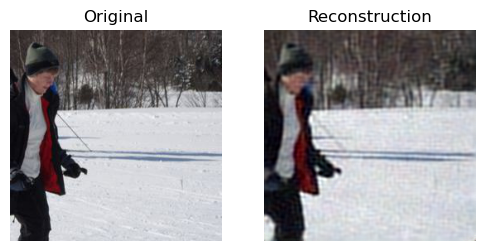

Training:  75%|██████████████████████████████████████████████████▎                | 7500/10000 [54:42<18:16,  2.28it/s]


[Step 7500] Loss: 2.0541 | MSE: 0.003264 | PSNR: 24.862503 | BPP: 0.382925 | Ry: 0.354133 | Rz: 0.028791 | Total Bits: 25095.3477 | Base Bits: 23208.4883 | Side Information Bits: 1886.8604
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -13.7699 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -5.9458 | max: -0.3078
Latent Variable y | shape: (16, 128, 16, 16) | mean: -0.0017 | std: 1.4346 | range: -22.9230 - 21.9900
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: -0.0019 | std: 1.4632 | range: -23.3379 - 21.7978
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0105 | std: 0.4778 | range: -4.6058 - 2.8028
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.0103 | std: 0.5578 | range: -4.7757 - 21.9900
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.3941
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: 0.0195 | std: 1.1565
Entropy Parameter sigmas | shape: (16, 3,

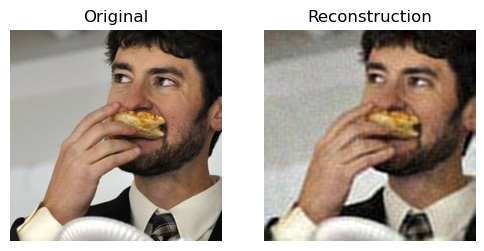

Training:  80%|█████████████████████████████████████████████████████▌             | 8000/10000 [58:21<14:36,  2.28it/s]


[Step 8000] Loss: 2.2418 | MSE: 0.003564 | PSNR: 24.480667 | BPP: 0.417063 | Ry: 0.392390 | Rz: 0.024672 | Total Bits: 27332.6211 | Base Bits: 25715.6914 | Side Information Bits: 1616.9292
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -17.2725 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -5.2126 | max: -0.2286
Latent Variable y | shape: (16, 128, 16, 16) | mean: -0.0024 | std: 1.4336 | range: -24.4147 - 21.6470
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: -0.0028 | std: 1.4618 | range: -24.3449 - 21.2158
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0035 | std: 0.4579 | range: -4.8676 - 2.8548
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.0000 | std: 0.5395 | range: -4.5299 - 21.6470
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.3958
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: 0.0200 | std: 1.1545
Entropy Parameter sigmas | shape: (16, 3,

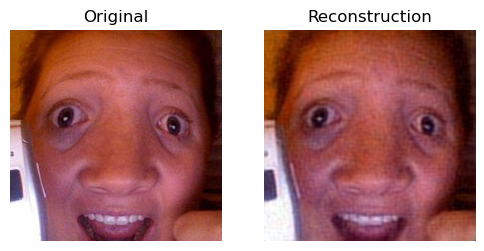

Training:  85%|███████████████████████████████████████████████████████▎         | 8500/10000 [1:01:59<10:54,  2.29it/s]


[Step 8500] Loss: 2.3563 | MSE: 0.003765 | PSNR: 24.242191 | BPP: 0.428547 | Ry: 0.405691 | Rz: 0.022855 | Total Bits: 28085.2324 | Base Bits: 26587.3770 | Side Information Bits: 1497.8545
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -13.5636 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -5.7982 | max: -0.1661
Latent Variable y | shape: (16, 128, 16, 16) | mean: 0.0070 | std: 1.4038 | range: -24.8826 - 22.7209
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: 0.0073 | std: 1.4338 | range: -25.2636 - 22.5408
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0043 | std: 0.4635 | range: -5.7465 - 2.9568
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: 0.0010 | std: 0.5468 | range: -5.6574 - 22.7209
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.3937
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: 0.0188 | std: 1.1155
Entropy Parameter sigmas | shape: (16, 3, 1

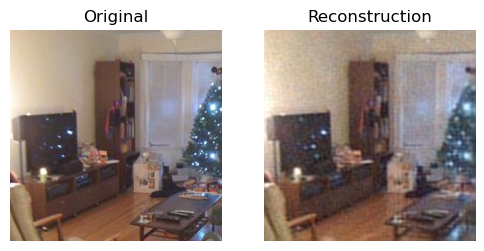

Training:  90%|██████████████████████████████████████████████████████████▌      | 9000/10000 [1:05:37<07:14,  2.30it/s]


[Step 9000] Loss: 2.3974 | MSE: 0.003838 | PSNR: 24.159071 | BPP: 0.432449 | Ry: 0.412223 | Rz: 0.020226 | Total Bits: 28340.9531 | Base Bits: 27015.4297 | Side Information Bits: 1325.5223
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -16.4848 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -4.9833 | max: -0.1179
Latent Variable y | shape: (16, 128, 16, 16) | mean: -0.0222 | std: 1.3603 | range: -20.2486 - 15.0591
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: -0.0225 | std: 1.3904 | range: -20.3501 - 15.0780
Latent Variable z | shape: (16, 128, 4, 4) | mean: -0.0011 | std: 0.4360 | range: -6.0585 - 3.9337
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: -0.0032 | std: 0.5238 | range: -6.0593 - 15.0591
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.4031
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: -0.0052 | std: 1.0567
Entropy Parameter sigmas | shape: (16,

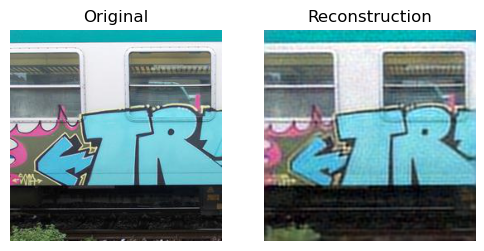

Training:  95%|█████████████████████████████████████████████████████████████▊   | 9500/10000 [1:09:15<03:37,  2.30it/s]


[Step 9500] Loss: 1.9052 | MSE: 0.002913 | PSNR: 25.356949 | BPP: 0.413857 | Ry: 0.395368 | Rz: 0.018489 | Total Bits: 27122.5098 | Base Bits: 25910.8125 | Side Information Bits: 1211.6978
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -15.0696 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -7.2904 | max: -0.0815
Latent Variable y | shape: (16, 128, 16, 16) | mean: -0.0405 | std: 1.5527 | range: -23.3575 - 24.1970
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: -0.0404 | std: 1.5794 | range: -23.6359 - 24.5506
Latent Variable z | shape: (16, 128, 4, 4) | mean: 0.0012 | std: 0.4388 | range: -7.1983 - 3.6044
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: -0.0008 | std: 0.5274 | range: -7.1253 - 24.1970
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.3829
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: -0.0200 | std: 1.2472
Entropy Parameter sigmas | shape: (16, 

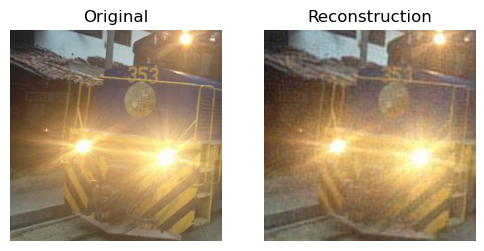

Training: 100%|████████████████████████████████████████████████████████████████| 10000/10000 [1:12:53<00:00,  2.30it/s]


[Step 10000] Loss: 2.0152 | MSE: 0.003108 | PSNR: 25.075676 | BPP: 0.424102 | Ry: 0.406794 | Rz: 0.017308 | Total Bits: 27793.9414 | Base Bits: 26659.6406 | Side Information Bits: 1134.3000
Total parameters: 7,312,707
Log_Probabilites logp_y | shape: (16, 128, 16, 16) | min: -13.2820 | max: 0.0000
Log_Probabilites logp_z | shape: (16, 128, 4, 4) | min: -6.4628 | max: -0.0548
Latent Variable y | shape: (16, 128, 16, 16) | mean: -0.0143 | std: 1.5491 | range: -26.3014 - 26.4787
Qantized Variable y_hat | shape: (16, 128, 16, 16) | mean: -0.0151 | std: 1.5755 | range: -26.5220 - 26.5472
Latent Variable z | shape: (16, 128, 4, 4) | mean: -0.0025 | std: 0.4475 | range: -7.9312 - 4.4445
Qantized Variable z_hat | shape: (16, 128, 4, 4) | mean: -0.0027 | std: 0.5335 | range: -8.1839 - 26.4787
Entropy Parameter weights | shape: (16, 3, 128, 16, 16) | mean: 0.3333 | std: 0.3853
Entropy Parameter mus | shape: (16, 3, 128, 16, 16) | mean: 0.0142 | std: 1.2260
Entropy Parameter sigmas | shape: (16,

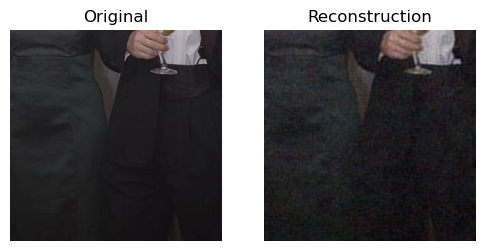

Training: 100%|████████████████████████████████████████████████████████████████| 10000/10000 [1:12:53<00:00,  2.29it/s]


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = JointAutoregressiveHierarchical(latent_channels=128, K=3).to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-4)
lambda_val = 512 # trade-off  [32, 64, 128, 256, 512, 1024, 2048] 

# --- Training hyperparams ---
max_steps = 10000  # total training steps (not epochs)
log_interval = 500  # steps between smoke test logging

step = 0
model.train()
train_iter = iter(train_loader)  # iterator over dataset

pbar = tqdm(total=max_steps, desc="Training")

while step < max_steps:
    try:
        imgs = next(train_iter)
    except StopIteration:
        # restart the iterator when we reach end of dataset
        train_iter = iter(train_loader)
        imgs = next(train_iter)

    imgs = imgs.to(device)
    optimizer.zero_grad()

    # Forward ( with debugging )
    #if step % (2*log_interval) == 0:
    #   model_out = model(imgs, debug=True)
    #else:    
    #   model_out = model(imgs)
    model_out = model(imgs)

    # Compute RD loss
    results = rd_loss(model_out, imgs, lambda_val)
    loss = results['loss']
    loss.backward()
    optimizer.step()

    step += 1
    pbar.update(1)

    # Smoke test logging
    if step % log_interval == 0:
        print(f"\n[Step {step}] Loss: {loss.item():.4f} | "
              f"MSE: {results['mse']:.6f} | "
              f"PSNR: {results['psnr']:.6f} | "
              f"BPP: {results['bpp_total']:.6f} | "
              f"Ry: {results['bpp_y']:.6f} | "
              f"Rz: {results['bpp_z']:.6f} | "
              f"Total Bits: {results['bits_total']:.4f} | "
              f"Base Bits: {results['bits_y']:.4f} | "
              f"Side Information Bits: {results['bits_z']:.4f}")


        # Print some key parameter stats
        with torch.no_grad():
            total_params = sum(p.numel() for p in model.parameters())
            print(f"Total parameters: {total_params:,}")
            print(f"Log_Probabilites logp_y | shape: {tuple(model_out['logp_y'].shape)} | min: {model_out['logp_y'].min().item():.4f} | max: {model_out['logp_y'].max().item():.4f}")
            print(f"Log_Probabilites logp_z | shape: {tuple(model_out['logp_z'].shape)} | min: {model_out['logp_z'].min().item():.4f} | max: {model_out['logp_z'].max().item():.4f}")
            print(f"Latent Variable y | shape: {tuple(model_out['y'].shape)} | mean: {model_out['y'].mean().item():.4f} | std: {model_out['y'].std().item():.4f} | range: {model_out['y'].min().item():.4f} - {model_out['y'].max().item():.4f}")
            print(f"Qantized Variable y_hat | shape: {tuple(model_out['y_in'].shape)} | mean: {model_out['y_in'].mean().item():.4f} | std: {model_out['y_in'].std().item():.4f} | range: {model_out['y_in'].min().item():.4f} - {model_out['y_in'].max().item():.4f}")
            print(f"Latent Variable z | shape: {tuple(model_out['z'].shape)} | mean: {model_out['z'].mean().item():.4f} | std: {model_out['z'].std().item():.4f} | range: {model_out['z'].min().item():.4f} - {model_out['z'].max().item():.4f}")
            print(f"Qantized Variable z_hat | shape: {tuple(model_out['z_in'].shape)} | mean: {model_out['z_in'].mean().item():.4f} | std: {model_out['z_in'].std().item():.4f} | range: {model_out['z_in'].min().item():.4f} - {model_out['y'].max().item():.4f}")
            #print(f"Entropy Parameter mu | shape: {tuple(model_out['mu'].shape)} | mean: {model_out['mu'].mean().item():.4f} | std: {model_out['mu'].std().item():.4f}")
            #print(f"Entropy Parameter sigma | shape: {tuple(model_out['sigma'].shape)} | mean: {model_out['sigma'].mean().item():.4f} | std: {model_out['sigma'].std().item():.4f}")
            print(f"Entropy Parameter weights | shape: {tuple(model_out['weights'].shape)} | mean: {model_out['weights'].mean().item():.4f} | std: {model_out['weights'].std().item():.4f}")
            print(f"Entropy Parameter mus | shape: {tuple(model_out['mus'].shape)} | mean: {model_out['mus'].mean().item():.4f} | std: {model_out['mus'].std().item():.4f}")
            print(f"Entropy Parameter sigmas | shape: {tuple(model_out['sigmas'].shape)} | mean: {model_out['sigmas'].mean().item():.4f} | std: {model_out['sigmas'].std().item():.4f}")



        # Plot original vs reconstruction (pick random image from batch)
        idx = random.randint(0, imgs.size(0) - 1)
        orig = imgs[idx].detach().cpu().permute(1, 2, 0).numpy()
        recon = model_out['x_hat'][idx].detach().cpu().permute(1, 2, 0).numpy()

        fig, axs = plt.subplots(1, 2, figsize=(6, 3))
        axs[0].imshow(orig.clip(0, 1))
        axs[0].set_title("Original")
        axs[0].axis("off")
        axs[1].imshow(recon.clip(0, 1))
        axs[1].set_title("Reconstruction")
        axs[1].axis("off")
        plt.show()

pbar.close()

### Evaluation

In [5]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
])

kodak_dir = "./kodak"
test_dataset = KodakDataset(kodak_dir, transform=transform_test)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [6]:
evaluator = CompressionEvaluator(model, test_loader, device, lambda_val)
avg_metrics, imgs_list, recon_list = evaluator.evaluate(rd_loss)


--- Evaluation Results ---
MSE(255): 153.682508
PSNR(RGB): 26.848769
MS-SSIM(RGB): 0.930280
PSNR(Y): 27.252808
MS-SSIM(Y): 0.941481
BPP: 0.331723
BPP(y): 0.331723
BPP(z): 0.014177


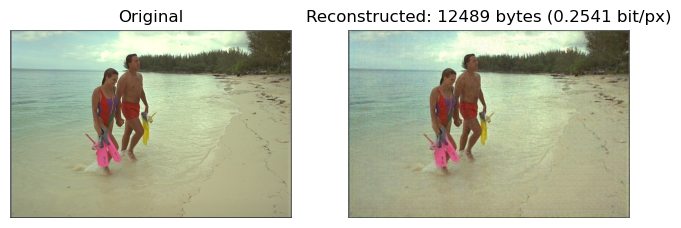

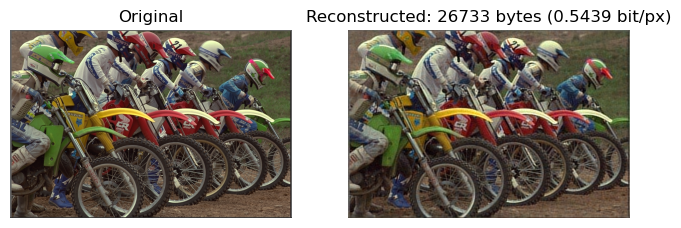

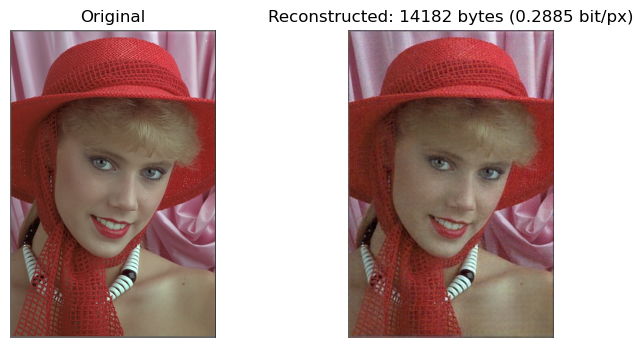

In [7]:
evaluator.plot_samples(imgs_list, recon_list, rd_loss, n=3)

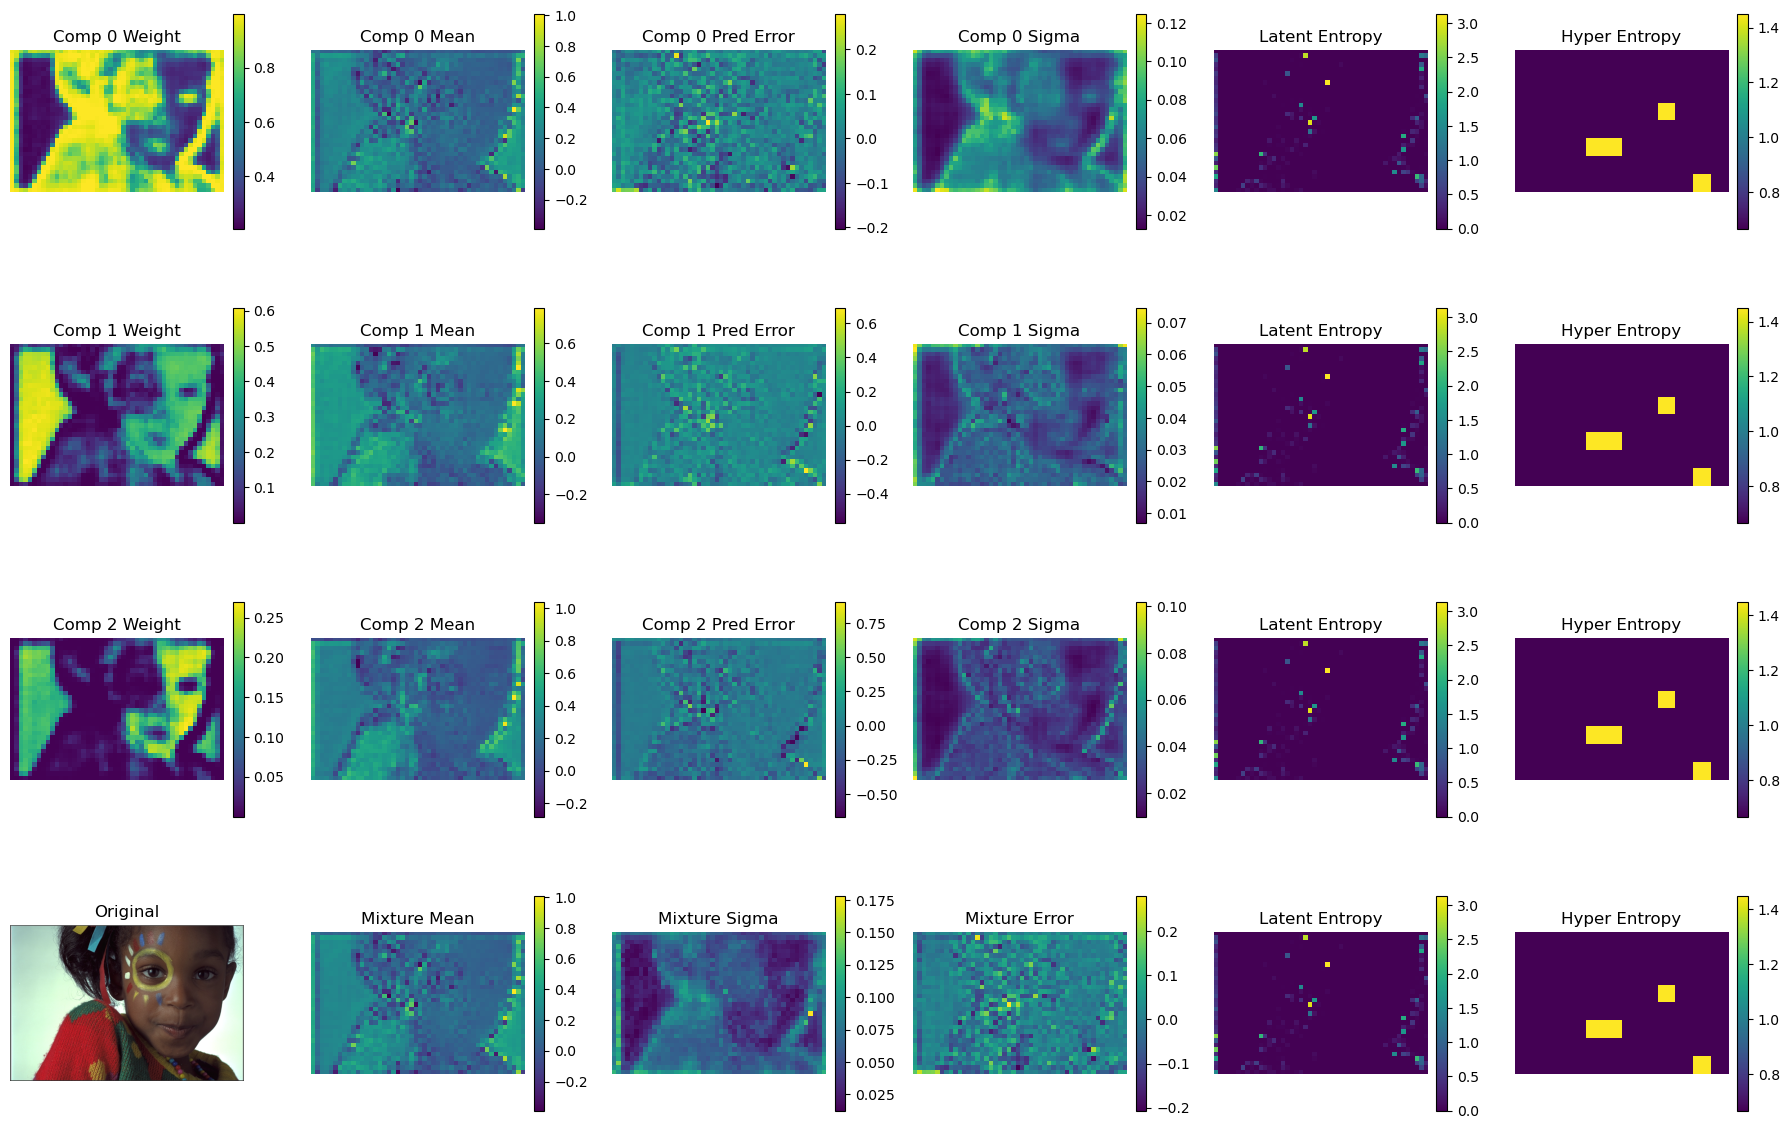

In [8]:
evaluator.plot_high_entropy_channel(imgs_list)